In [59]:
import hashlib
import base58
import pandas as pd

def eth_to_tron_address(eth_address):
    try:
        # Validate Ethereum address format
        if not isinstance(eth_address, str) or len(eth_address) != 42 or not eth_address.startswith('0x'):
            return 'Invalid Address'
        
        # Remove '0x' and decode hex to bytes
        eth_address = eth_address.lower().replace('0x', '')
        address_bytes = bytes.fromhex(eth_address)
        
        # Add Tron prefix (0x41)
        tron_prefix = b'\x41'
        prefixed_address = tron_prefix + address_bytes
        
        # Compute double SHA-256 hash
        first_hash = hashlib.sha256(prefixed_address).digest()
        second_hash = hashlib.sha256(first_hash).digest()
        
        # Take first 4 bytes of second hash as checksum
        checksum = second_hash[:4]
        
        # Combine prefixed address and checksum
        final_bytes = prefixed_address + checksum
        
        # Encode to Base58Check
        tron_address = base58.b58encode(final_bytes).decode('utf-8')
        
        return tron_address
    except Exception as e:
        return f"Error: {str(e)}"

# Example: Convert a single address
eth_address = '0x27e0ce6fdf815c33f68fb2593e29844d84da5757'
tron_address = eth_to_tron_address(eth_address)
print(f"Ethereum Address: {eth_address}")
print(f"Tron Address: {tron_address}")

# Load and process CSV
try:
    df = pd.read_csv('/home/tripl3tr3s/projects/otc_wallet_analysis/data/possible_OTC_wallets_cleaned_v1.csv')
    
    # Apply conversion to sender and receiver columns
    df['sender_tron_address'] = df['sender'].apply(eth_to_tron_address)
    df['receiver_tron_address'] = df['receiver'].apply(eth_to_tron_address)
    
    # Save the updated DataFrame
    df.to_csv('possible_OTC_wallets_with_tron_addresses.csv', index=False)
    
    # Display the first few rows
    print(df[['sender', 'sender_tron_address', 'receiver', 'receiver_tron_address']].head())
except FileNotFoundError:
    print("Error: 'possible_OTC_wallets.csv' not found. Please check the file path.")
except Exception as e:
    print(f"Error processing CSV: {str(e)}")

Ethereum Address: 0x27e0ce6fdf815c33f68fb2593e29844d84da5757
Tron Address: TDc4fMykFxrimwwTeNm7YXjoorHqXLGcLs
                                       sender  \
0  0x27e0ce6fdf815c33f68fb2593e29844d84da5757   
1  0xd3910012a66288289c6bc2e758da9e876b3cf993   
2  0x569ca0fd77d36609543b8975807401e582c6460e   
3  0xc314bdf9650eba09b4f2b2715f7e011276ad38de   
4  0xb15dc2a8271b323fcf4464b328485fd3bb7533e2   

                  sender_tron_address  \
0  TDc4fMykFxrimwwTeNm7YXjoorHqXLGcLs   
1  TVFsHLBoPnHnb32gQHJuKw5RqziGxuoyJW   
2  THsAkKZr11KrxzujcFx4mH1R97SDLLnp7n   
3  TTkhcejW39VdDmxgv9DxDJSboAZN4NhD1d   
4  TS92vbereckRSP9hHPCvzfibuj4HG3X2Ys   

                                     receiver  \
0  0x99469fd5aa08cfe836395ce993c0ebd567e2c14f   
1  0x2a68baf67f1c497d9a4a609276a90dcd6ea77444   
2  0xd3910012a66288289c6bc2e758da9e876b3cf993   
3  0x2dfabe28cf3a6c4b4c7a6bbe4217d949ec3df04c   
4  0xc686c48436aec3a1dfce4ac5a4526c39366985ba   

                receiver_tron_address  
0  TPwezUWpEG

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the CSV file with Tron addresses
try:
    df = pd.read_csv('/home/tripl3tr3s/projects/otc_wallet_analysis/data/possible_OTC_wallets_with_tron_addresses.csv')
except FileNotFoundError:
    df = pd.read_csv('/home/tripl3tr3s/projects/otc_wallet_analysis/data/possible_OTC_wallets_cleaned_v1.csv')
    print("Loaded original CSV. Tron addresses not found; rerun address conversion if needed.")

# Convert block_time to datetime
df['block_time'] = pd.to_datetime(df['block_time'], format='%d/%m/%Y %H:%M')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_hash          1000 non-null   object        
 1   block_time                1000 non-null   datetime64[ns]
 2   block_number              1000 non-null   int64         
 3   sender                    1000 non-null   object        
 4   receiver                  990 non-null    object        
 5   transaction_value_in_TRX  1000 non-null   float64       
 6   sender_tx_count           1000 non-null   int64         
 7   sender_first_tx           1000 non-null   object        
 8   sender_active_days        1000 non-null   int64         
 9   receiver_tx_count         990 non-null    float64       
 10  receiver_first_tx         990 non-null    object        
 11  receiver_active_days      990 non-null    float64       
 12  contrac

Number of transactions >= 400000 TRX: 428

Top 5 high-value transactions:
                                     transaction_hash  \
7   0x26307e9e90a8aa87a4b8065915bb357e13512f246020...   
29  0x8e93d214333889065fd33796c08dd00ec7ff90558cdc...   
30  0x2de190622af9f902d2f6f296d23aac6f27d91765b44c...   
31  0x4418f58fe8d678f32c94302bf704d3c3fc9535185c4d...   
32  0xc5702b836ab227af9a6e62befde10fa4acd5de0b5350...   

                   sender_tron_address               receiver_tron_address  \
7   TTvMe55USCAPy2M1FZjw8DLMuZLbuSZyLE  TMbRMNrFfAD18Hekpp5sXrmsZ6rnS529TY   
29  TJYbE9mz5tRYo6gng6okCSe2MHi77yKfBq  TDqSquXBgUCLYvYC4XZgrprLK589dkhSCf   
30  TAGrk65jKnQMY6uxJt4PrvhamRBCUcFMjh  TJYbE9mz5tRYo6gng6okCSe2MHi77yKfBq   
31  TK86Qm97uM848dMk8G7xNbJB7zG1uW3h1n  TFTWNgDBkQ5wQoP8RXpRznnHvAVV8x5jLu   
32  TVoNsDjduEnDBU3Q2dn56xa168x7PnFAWZ  TAGrk65jKnQMY6uxJt4PrvhamRBCUcFMjh   

    transaction_value_in_TRX contract_name  
7                   410000.0           NaN  
29                  4699

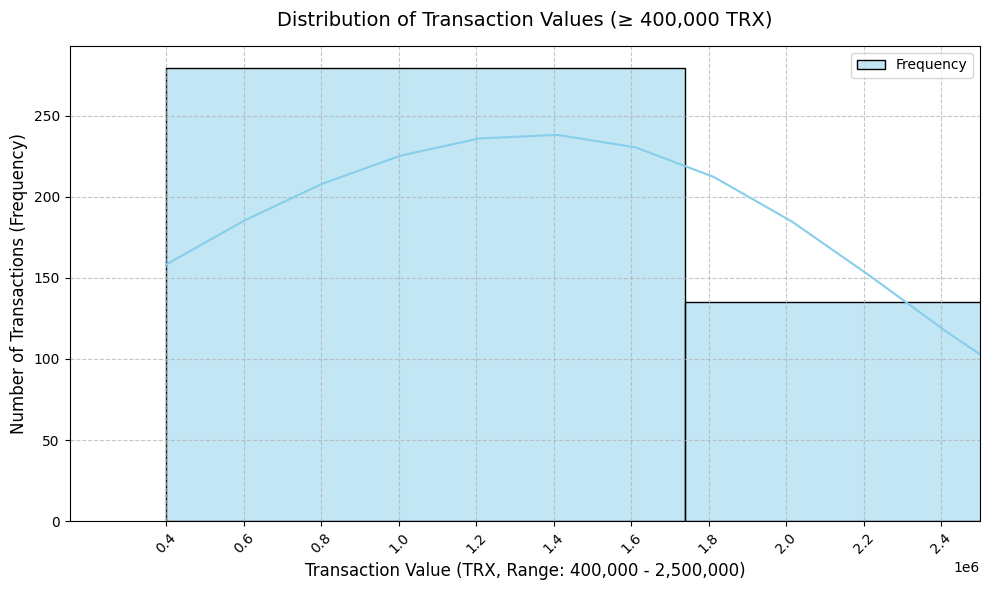

In [ ]:
# Make sure cell 1 has been run so that 'df' is defined

# Define threshold for high-value transactions
value_threshold = 400000 # ~$110,000 USD at current TRX price

# Filter high-value transactions
high_value_df = df[df['transaction_value_in_TRX'] >= value_threshold]

# Display summary
print(f"Number of transactions >= {value_threshold} TRX: {len(high_value_df)}")
print("\nTop 5 high-value transactions:")
print(high_value_df[['transaction_hash', 'sender_tron_address', 'receiver_tron_address', 'transaction_value_in_TRX', 'contract_name']].head())

# Plot distribution of high-value transactions with enhanced visualization
plt.figure(figsize=(10, 6))  # tweak figure size for better readability
sns.histplot(data=high_value_df, x='transaction_value_in_TRX', bins=30, kde=True, color='skyblue', label='Frequency')
plt.title('Distribution of Transaction Values (≥ 400,000 TRX)', fontsize=14, pad=15)
plt.xlabel('Transaction Value (TRX, Range: 400,000 - 2,500,000)', fontsize=12)
plt.ylabel('Number of Transactions (Frequency)', fontsize=12)
plt.xlim(150000, 2500000)  # Set x-axis range to match data distribution
plt.xticks(np.arange(400000, 2600000, 200000), rotation=45)  # Custom x-ticks for clarity
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.legend()  # Add legend for KDE
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

Number of transactions involving potential OTC wallets: 877

Sample of potential OTC transactions:
                  sender_tron_address               receiver_tron_address  \
0  TDc4fMykFxrimwwTeNm7YXjoorHqXLGcLs  TPwezUWpEGmFBENNWJHwXHRG1D2NCEEt5s   
1  TVFsHLBoPnHnb32gQHJuKw5RqziGxuoyJW  TDqSquXBgUCLYvYC4XZgrprLK589dkhSCf   
2  THsAkKZr11KrxzujcFx4mH1R97SDLLnp7n  TVFsHLBoPnHnb32gQHJuKw5RqziGxuoyJW   
3  TTkhcejW39VdDmxgv9DxDJSboAZN4NhD1d  TEAKncB31q3NjrJ7pbsKW4pC84sUCuPS7w   
4  TS92vbereckRSP9hHPCvzfibuj4HG3X2Ys  TU4vEruvZwLLkSfV9bNw12EJTPvNr7Pvaa   

   transaction_value_in_TRX  sender_tx_count  receiver_tx_count  \
0                  123000.0                1                  5   
1                  394994.0                2                 17   
2                  394994.0                1                  2   
3                  250000.0                2                  2   
4                  129957.0                2                  5   

   sender_active_days  receiver_act

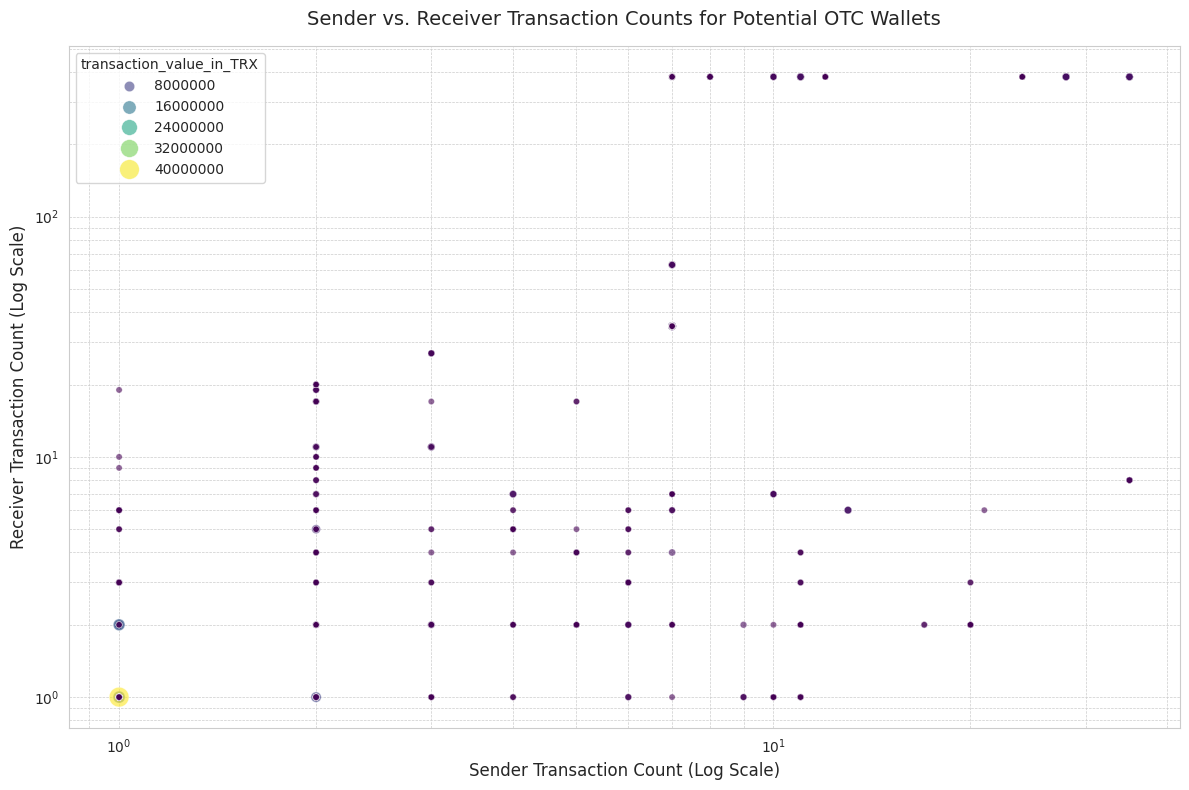

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define thresholds for low activity
tx_count_threshold = 10  # Low transaction count
active_days_threshold = 5  # Short active period

# Flag low-activity senders and receivers
df['sender_low_activity'] = (df['sender_tx_count'] <= tx_count_threshold) | (df['sender_active_days'] <= active_days_threshold)
df['receiver_low_activity'] = (df['receiver_tx_count'] <= tx_count_threshold) | (df['receiver_active_days'] <= active_days_threshold)

# Create a flag for potential OTC wallets (either sender or receiver is low activity)
df['potential_otc_wallet'] = df['sender_low_activity'] | df['receiver_low_activity']

# Summarize
print("Number of transactions involving potential OTC wallets:", df['potential_otc_wallet'].sum())
print("\nSample of potential OTC transactions:")
print(df[df['potential_otc_wallet']][['sender_tron_address', 'receiver_tron_address', 'transaction_value_in_TRX', 'sender_tx_count', 'receiver_tx_count', 'sender_active_days', 'receiver_active_days']].head())

# Plot transaction counts for potential OTC wallets with enhancements
plt.figure(figsize=(12, 8))  # Larger figure size for better readability
sns.scatterplot(data=df[df['potential_otc_wallet']], 
                x='sender_tx_count', 
                y='receiver_tx_count', 
                hue='transaction_value_in_TRX', 
                size='transaction_value_in_TRX', 
                palette='viridis',  # Distinct color palette
                sizes=(20, 200),    # Wider size range for visibility
                alpha=0.6,          # Transparency to handle overplotting
                legend='brief')     # Brief legend to avoid clutter

# Apply logarithmic scale to both axes
plt.xscale('log')
plt.yscale('log')

# Set titles and labels
plt.title('Sender vs. Receiver Transaction Counts for Potential OTC Wallets', fontsize=14, pad=15)
plt.xlabel('Sender Transaction Count (Log Scale)', fontsize=12)
plt.ylabel('Receiver Transaction Count (Log Scale)', fontsize=12)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
# Drop rows with missing sender or receiver in place
df.dropna(subset=['sender', 'receiver'], inplace=True)

# Create a sorted tuple of sender-receiver pairs to avoid directionality issues
df['wallet_pair'] = df.apply(lambda x: tuple(sorted([x['sender_tron_address'], x['receiver_tron_address']])), axis=1)

# Group by wallet pair and count transactions
pair_counts = df.groupby('wallet_pair').size().reset_index(name='pair_tx_count')

# Filter pairs with multiple transactions
reciprocal_pairs = pair_counts[pair_counts['pair_tx_count'] > 1]

# Merge with original DataFrame to get details
reciprocal_df = df.merge(reciprocal_pairs, on='wallet_pair', how='inner')

# Summarize
print("Number of wallet pairs with multiple transactions:", len(reciprocal_pairs))
print("\nTop reciprocal pairs:")
print(reciprocal_pairs.sort_values('pair_tx_count', ascending=False).head())

# Display sample transactions for top reciprocal pair
top_pair = reciprocal_pairs.sort_values('pair_tx_count', ascending=False).iloc[0]['wallet_pair']
print(f"\nTransactions for top reciprocal pair {top_pair}:")
print(reciprocal_df[reciprocal_df['wallet_pair'] == top_pair][['sender_tron_address', 'receiver_tron_address', 'transaction_value_in_TRX', 'block_time']])

Number of wallet pairs with multiple transactions: 97

Top reciprocal pairs:
                                           wallet_pair  pair_tx_count
37   (TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi, TCFNp179L...             35
91   (TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj, TEdtftSTn...             28
97   (TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj, TLGXeWvAy...             28
76   (TBcRRYrjm5k9tJBREdaft2LgxRZtaaWjtV, TJ4NNy8xZ...             28
103  (TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj, TP5pFBezq...             28

Transactions for top reciprocal pair ('TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi', 'TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj'):
                    sender_tron_address               receiver_tron_address  \
553  TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   
554  TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   
555  TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   
556  TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi  TCFNp179Lg46D16zKoumd4Poa2WFFd

Token Usage Summary:
  contract_name  tx_count  total_value_trx  avg_value_trx  unique_senders  \
1       TrueUSD       161      147499900.0  916148.447205              58   
2          wbtc       161      147499900.0  916148.447205              58   
0    Tether_USD        69       65652884.0  951491.072464              48   

   unique_receivers  
1                 7  
2                 7  
0                 5  


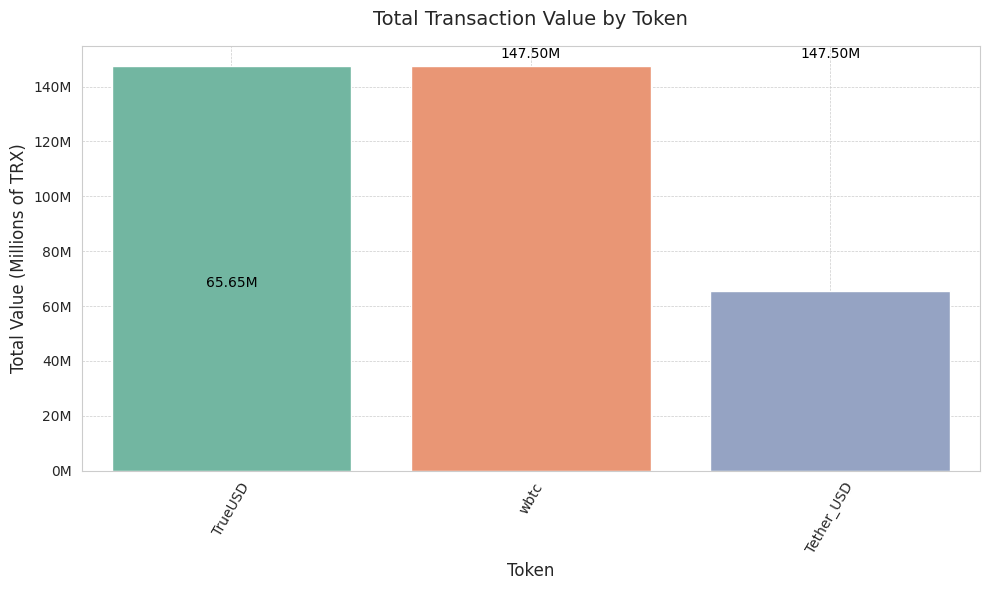

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Group by contract_name and summarize transaction values
token_summary = df.groupby('contract_name').agg({
    'transaction_value_in_TRX': ['count', 'sum', 'mean'],
    'sender_tron_address': 'nunique',
    'receiver_tron_address': 'nunique'
}).reset_index()

# Flatten column names
token_summary.columns = ['contract_name', 'tx_count', 'total_value_trx', 'avg_value_trx', 'unique_senders', 'unique_receivers']

# Sort the DataFrame by total_value_trx in descending order
token_summary = token_summary.sort_values('total_value_trx', ascending=False)

# Display summary
print("Token Usage Summary:")
print(token_summary)

# Plot total transaction value by token with enhancements
plt.figure(figsize=(10, 6))

# Create bar plot with a color palette for visual distinction
sns.barplot(data=token_summary, x='contract_name', y='total_value_trx', palette='Set2')

# Add data labels on top of each bar
for index, row in token_summary.iterrows():
    plt.text(index, row['total_value_trx'] + 0.02 * row['total_value_trx'],  # Position slightly above the bar
             f'{row["total_value_trx"]/1e6:.2f}M',  # Display value in millions
             ha='center', fontsize=10, color='black')

# Set title and labels with improved styling
plt.title('Total Transaction Value by Token', fontsize=14, pad=15)
plt.xlabel('Token', fontsize=12)
plt.ylabel('Total Value (Millions of TRX)', fontsize=12)

# Rotate x-axis labels to 60 degrees for better readability
plt.xticks(rotation=60)

# Format y-axis to show millions of TRX
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Add gridlines for better estimation
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Optimize layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

Risk Profile Summary:
          sender_risk_profile       receiver_risk_profile  tx_count  \
3  low_risk_moderate_activity      low_risk_high_activity       163   
7    medium_risk_low_activity      low_risk_high_activity       219   
0               high_risk_new               high_risk_new       248   
8    medium_risk_low_activity  low_risk_moderate_activity       105   
2               high_risk_new    medium_risk_low_activity        74   
6    medium_risk_low_activity               high_risk_new        69   
4  low_risk_moderate_activity  low_risk_moderate_activity        55   
9    medium_risk_low_activity    medium_risk_low_activity        21   
1               high_risk_new  low_risk_moderate_activity        27   
5  low_risk_moderate_activity    medium_risk_low_activity         9   

   total_value_trx  avg_value_trx  unique_senders  unique_receivers  
3      189640240.0   1.163437e+06               6                 1  
7      180214004.0   8.228950e+05              26       

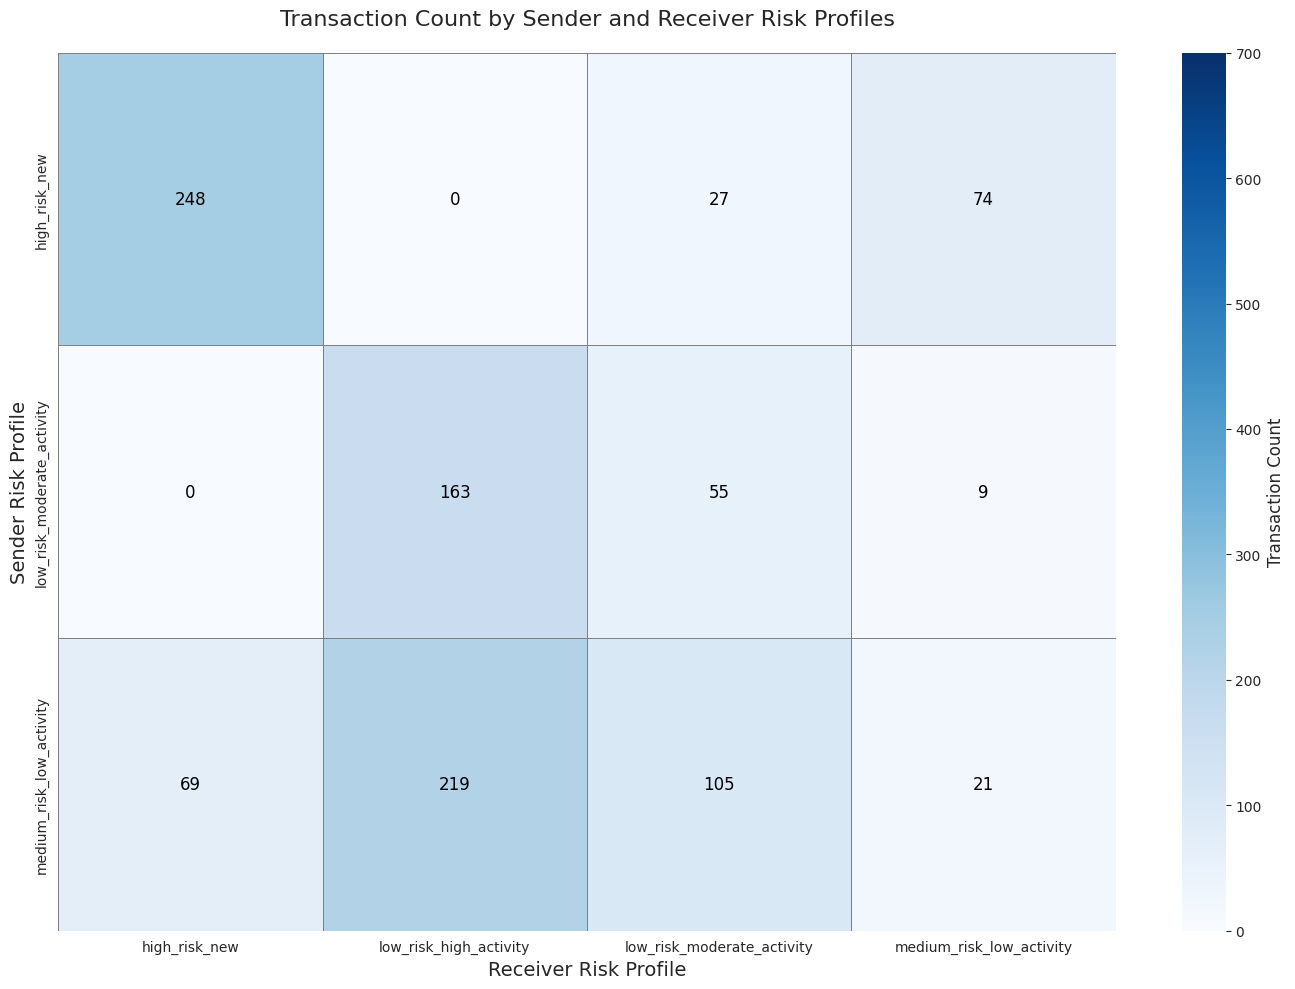

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize risk profiles
risk_profile_summary = df.groupby(['sender_risk_profile', 'receiver_risk_profile']).agg({
    'transaction_value_in_TRX': ['count', 'sum', 'mean'],
    'sender_tron_address': 'nunique',
    'receiver_tron_address': 'nunique'
}).reset_index()

# Flatten column names
risk_profile_summary.columns = ['sender_risk_profile', 'receiver_risk_profile', 'tx_count', 'total_value_trx', 'avg_value_trx', 'unique_senders', 'unique_receivers']

# Display summary
print("Risk Profile Summary:")
print(risk_profile_summary.sort_values('total_value_trx', ascending=False))

# Plot transaction count by risk profile pair with enhancements
plt.figure(figsize=(14, 10))  # Larger figure size for better visibility

# Create pivot table
pivot_table = risk_profile_summary.pivot_table(values='tx_count', index='sender_risk_profile', columns='receiver_risk_profile', fill_value=0)

# Create heatmap with adjusted color scale, borders, and dynamic annotation colors
ax = sns.heatmap(pivot_table, 
                 annot=True, 
                 fmt='.0f', 
                 cmap='Blues', 
                 vmin=0, 
                 vmax=700,  # Set to slightly above the maximum value (699)
                 linewidths=0.5, 
                 linecolor='gray',  # Add cell borders
                 annot_kws={"size": 12})  # Increase annotation font size

# Dynamically adjust annotation colors based on cell value
for text in ax.texts:
    text_val = float(text.get_text())
    if text_val > 300:  # Threshold for switching to white text
        text.set_color('white')
    else:
        text.set_color('black')

# Set title and labels with larger font sizes
plt.title('Transaction Count by Sender and Receiver Risk Profiles', fontsize=16, pad=20)
plt.xlabel('Receiver Risk Profile', fontsize=14)
plt.ylabel('Sender Risk Profile', fontsize=14)

# Adjust color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Transaction Count', fontsize=12)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

Top 10 wallets by centrality:
 1. TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj
    Degree Centrality: 0.0661 | Betweenness: 0.0000
    Total Volume: 26,498,692 TRX | Connections: 32 (In: 32, Out: 0)

 2. TXrauXw2wazRPZd2Q5tSYRnFveCyeaCign
    Degree Centrality: 0.0372 | Betweenness: 0.0112
    Total Volume: 3,711,299 TRX | Connections: 18 (In: 11, Out: 7)

 3. TDqSquXBgUCLYvYC4XZgrprLK589dkhSCf
    Degree Centrality: 0.0331 | Betweenness: 0.0069
    Total Volume: 5,161,612 TRX | Connections: 16 (In: 14, Out: 2)

 4. TTd9qHyjqiUkfTxe3gotbuTMpjU8LEbpkN
    Degree Centrality: 0.0207 | Betweenness: 0.0011
    Total Volume: 2,465,527 TRX | Connections: 10 (In: 3, Out: 7)

 5. TQP488XgXfQfKDuaFoDLfNiQ3Xcme11CPA
    Degree Centrality: 0.0207 | Betweenness: 0.0000
    Total Volume: 1,037,480 TRX | Connections: 10 (In: 0, Out: 10)

 6. TFVisXFaijZfeyeSjCEVkHfex7HGdTxzF9
    Degree Centrality: 0.0186 | Betweenness: 0.0000
    Total Volume: 10,251,382 TRX | Connections: 9 (In: 9, Out: 0)

 7. THwyeoCMSXQq2

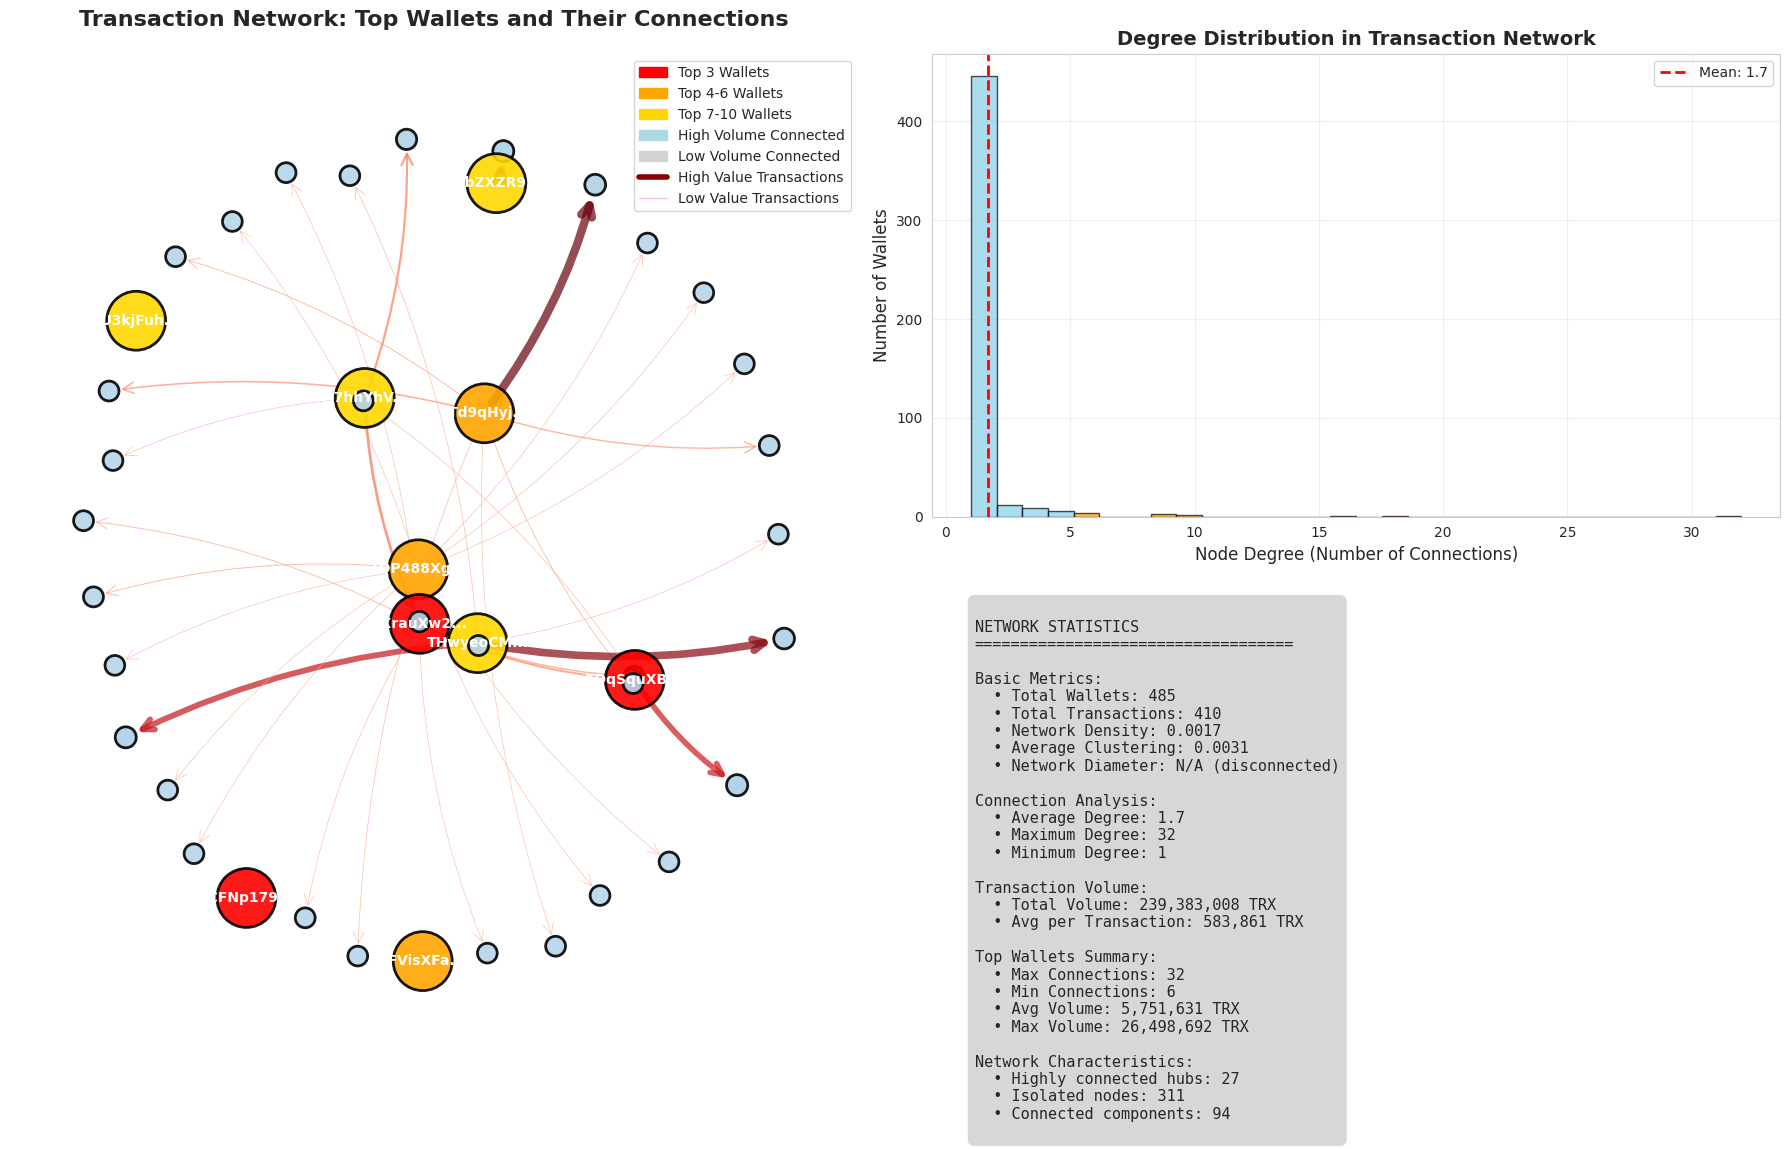


TRANSACTION FLOW ANALYSIS
 1. TCFNp179Lg46... - 🔴 Net Receiver
    Inflow:    26,498,692 TRX (32 transactions)
    Outflow:            0 TRX (0 transactions)
    Net:      +26,498,692 TRX

 2. TXrauXw2wazR... - 🔴 Net Receiver
    Inflow:     2,620,000 TRX (11 transactions)
    Outflow:    1,091,299 TRX (7 transactions)
    Net:       +1,528,701 TRX

 3. TDqSquXBgUCL... - 🔴 Net Receiver
    Inflow:     4,325,067 TRX (14 transactions)
    Outflow:      836,545 TRX (2 transactions)
    Net:       +3,488,522 TRX

 4. TTd9qHyjqiUk... - 🔵 Net Sender
    Inflow:       500,000 TRX (3 transactions)
    Outflow:    1,965,527 TRX (7 transactions)
    Net:       -1,465,527 TRX

 5. TQP488XgXfQf... - 🔵 Net Sender
    Inflow:             0 TRX (0 transactions)
    Outflow:    1,037,480 TRX (10 transactions)
    Net:       -1,037,480 TRX

 6. TFVisXFaijZf... - 🔴 Net Receiver
    Inflow:    10,251,382 TRX (9 transactions)
    Outflow:            0 TRX (0 transactions)
    Net:      +10,251,382 TRX

 

In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create a directed graph
G = nx.DiGraph()

# Add edges (transactions) with weights (transaction values)
for _, row in df.iterrows():
    G.add_edge(row['sender_tron_address'], row['receiver_tron_address'], weight=row['transaction_value_in_TRX'])

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Calculate total transaction volume per wallet (in + out)
wallet_volumes = {}
for node in G.nodes():
    in_volume = sum([G[u][node]['weight'] for u in G.predecessors(node)])
    out_volume = sum([G[node][v]['weight'] for v in G.successors(node)])
    wallet_volumes[node] = in_volume + out_volume

# Identify top 10 wallets by degree centrality for better network visualization
top_wallets = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_wallet_addresses = [wallet for wallet, _ in top_wallets]

# Print wallet analysis
print("Top 10 wallets by centrality:")
print("=" * 80)
for i, (wallet, centrality) in enumerate(top_wallets, 1):
    volume = wallet_volumes[wallet]
    betweenness = betweenness_centrality[wallet]
    closeness = closeness_centrality[wallet]
    in_degree = G.in_degree(wallet)
    out_degree = G.out_degree(wallet)
    
    print(f"{i:2d}. {wallet}")
    print(f"    Degree Centrality: {centrality:.4f} | Betweenness: {betweenness:.4f}")
    print(f"    Total Volume: {volume:,.0f} TRX | Connections: {in_degree + out_degree} (In: {in_degree}, Out: {out_degree})")
    print()

# Create a subgraph: top wallets and their immediate neighbors
ego_nodes = set()
for wallet in top_wallet_addresses:
    ego = nx.ego_graph(G, wallet, radius=1)
    ego_nodes.update(ego.nodes())
subG = G.subgraph(ego_nodes)

# Create enhanced visualization with focus on network and statistics
fig = plt.figure(figsize=(18, 12))

# Main network plot (larger, taking up more space)
ax1 = plt.subplot(2, 2, (1, 3))  # Spans top-left and bottom-left

# Calculate node sizes based on total transaction volume
node_volumes = [wallet_volumes.get(node, 0) for node in subG.nodes()]
max_volume = max(node_volumes) if node_volumes else 1
min_volume = min([v for v in node_volumes if v > 0]) if node_volumes else 1

# Enhanced node colors and sizes
node_colors = []
node_sizes = []
for node in subG.nodes():
    if node in top_wallet_addresses:
        # Color top wallets by their rank
        rank = top_wallet_addresses.index(node)
        if rank < 3:
            node_colors.append('red')      # Top 3 in red
        elif rank < 6:
            node_colors.append('orange')   # Next 3 in orange
        else:
            node_colors.append('gold')     # Rest in gold
        node_sizes.append(1800)  # Larger for top wallets
    else:
        # Color other nodes by their transaction volume
        volume = wallet_volumes.get(node, 0)
        if volume > 0:
            intensity = (volume - min_volume) / (max_volume - min_volume)
            node_colors.append(plt.cm.Blues(0.3 + 0.7 * intensity))
        else:
            node_colors.append('lightgray')
        # Size based on volume
        size = 200 + 600 * (volume / max_volume if max_volume > 0 else 0)
        node_sizes.append(size)

# Enhanced edge properties
edge_weights = [subG[u][v]['weight'] for u, v in subG.edges()]
if edge_weights:
    min_weight = min(edge_weights)
    max_weight = max(edge_weights)
    edge_widths = [0.5 + 5.5 * (w - min_weight) / (max_weight - min_weight) for w in edge_weights]
    edge_colors = [plt.cm.Reds(0.3 + 0.7 * (w - min_weight) / (max_weight - min_weight)) for w in edge_weights]
else:
    edge_widths = [1.0]
    edge_colors = ['gray']

# Create layout with better spacing
pos = nx.spring_layout(subG, k=2.0, iterations=100, seed=42)

# Draw the network with enhanced styling
nx.draw_networkx_nodes(subG, pos, node_color=node_colors, node_size=node_sizes, 
                      alpha=0.9, ax=ax1, linewidths=2, edgecolors='black')
nx.draw_networkx_edges(subG, pos, edge_color=edge_colors, width=edge_widths, 
                      arrows=True, arrowsize=20, arrowstyle='->', 
                      connectionstyle='arc3,rad=0.1', alpha=0.7, ax=ax1)

# Add labels for top wallets with better positioning
top_labels = {wallet: f"{wallet[:8]}..." for wallet in top_wallet_addresses}
nx.draw_networkx_labels(subG, pos, top_labels, font_size=10, font_weight='bold', 
                       font_color='white', ax=ax1)

ax1.set_title('Transaction Network: Top Wallets and Their Connections', 
              fontsize=16, fontweight='bold', pad=20)
ax1.axis('off')

# Enhanced legend
legend_elements = [
    mpatches.Patch(color='red', label='Top 3 Wallets'),
    mpatches.Patch(color='orange', label='Top 4-6 Wallets'),
    mpatches.Patch(color='gold', label='Top 7-10 Wallets'),
    mpatches.Patch(color='lightblue', label='High Volume Connected'),
    mpatches.Patch(color='lightgray', label='Low Volume Connected'),
    plt.Line2D([0], [0], color='darkred', lw=4, label='High Value Transactions'),
    plt.Line2D([0], [0], color='pink', lw=1, label='Low Value Transactions')
]
ax1.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1), fontsize=10)

# Degree distribution plot
ax2 = plt.subplot(2, 2, 2)
degrees = [G.degree(node) for node in G.nodes()]
n, bins, patches = ax2.hist(degrees, bins=30, alpha=0.7, color='skyblue', edgecolor='black')

# Color bars based on degree ranges
for i, (patch, degree_range) in enumerate(zip(patches, bins[:-1])):
    if degree_range >= 10:
        patch.set_facecolor('red')
    elif degree_range >= 5:
        patch.set_facecolor('orange')
    else:
        patch.set_facecolor('skyblue')

ax2.set_xlabel('Node Degree (Number of Connections)', fontsize=12)
ax2.set_ylabel('Number of Wallets', fontsize=12)
ax2.set_title('Degree Distribution in Transaction Network', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(np.mean(degrees), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(degrees):.1f}')
ax2.legend()

# Comprehensive network statistics
ax3 = plt.subplot(2, 2, 4)
ax3.axis('off')

# Calculate detailed network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_clustering = nx.average_clustering(G)
total_volume = sum(wallet_volumes.values()) / 2  # Divide by 2 to avoid double counting

# Calculate additional metrics
try:
    diameter = nx.diameter(G) if nx.is_connected(G.to_undirected()) else "N/A (disconnected)"
except:
    diameter = "N/A"

avg_degree = np.mean(degrees)
max_degree = max(degrees)
min_degree = min(degrees)

# Top wallet statistics
top_volumes = [wallet_volumes[w] for w in top_wallet_addresses]
top_connections = [G.degree(w) for w in top_wallet_addresses]

stats_text = f"""
NETWORK STATISTICS
{'='*35}

Basic Metrics:
  • Total Wallets: {num_nodes:,}
  • Total Transactions: {num_edges:,}
  • Network Density: {density:.4f}
  • Average Clustering: {avg_clustering:.4f}
  • Network Diameter: {diameter}

Connection Analysis:
  • Average Degree: {avg_degree:.1f}
  • Maximum Degree: {max_degree}
  • Minimum Degree: {min_degree}

Transaction Volume:
  • Total Volume: {total_volume:,.0f} TRX
  • Avg per Transaction: {total_volume/num_edges:,.0f} TRX

Top Wallets Summary:
  • Max Connections: {max(top_connections)}
  • Min Connections: {min(top_connections)}
  • Avg Volume: {np.mean(top_volumes):,.0f} TRX
  • Max Volume: {max(top_volumes):,.0f} TRX

Network Characteristics:
  • Highly connected hubs: {len([d for d in degrees if d > avg_degree * 2])}
  • Isolated nodes: {len([d for d in degrees if d == 1])}
  • Connected components: {nx.number_connected_components(G.to_undirected())}
"""

ax3.text(0.05, 0.95, stats_text, transform=ax3.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.9))

plt.tight_layout()
plt.show()

# Enhanced transaction flow analysis
print("\nTRANSACTION FLOW ANALYSIS")
print("=" * 50)
for i, wallet in enumerate(top_wallet_addresses, 1):
    in_volume = sum([G[u][wallet]['weight'] for u in G.predecessors(wallet)])
    out_volume = sum([G[wallet][v]['weight'] for v in G.successors(wallet)])
    net_flow = in_volume - out_volume
    
    if net_flow > 0:
        flow_type = "🔴 Net Receiver"
    elif net_flow < 0:
        flow_type = "🔵 Net Sender"
    else:
        flow_type = "⚫ Balanced"
    
    print(f"{i:2d}. {wallet[:12]}... - {flow_type}")
    print(f"    Inflow:  {in_volume:>12,.0f} TRX ({G.in_degree(wallet)} transactions)")
    print(f"    Outflow: {out_volume:>12,.0f} TRX ({G.out_degree(wallet)} transactions)")
    print(f"    Net:     {net_flow:>+12,.0f} TRX")
    print()

# Network health indicators
print("NETWORK HEALTH INDICATORS")
print("=" * 50)
high_degree_nodes = len([d for d in degrees if d > avg_degree * 3])
print(f"Hub concentration: {high_degree_nodes/num_nodes*100:.1f}% of nodes are major hubs")
print(f"Transaction concentration: Top 10 wallets handle {sum(top_volumes)/total_volume*50:.1f}% of total volume")
print(f"Network connectivity: {(num_edges/(num_nodes*(num_nodes-1)))*100:.3f}% of possible connections exist")

Potential OTC Hub Wallets:
                receiver_tron_address  unique_senders  total_value_trx  \
0  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj              32      369854244.0   
2  TFVisXFaijZfeyeSjCEVkHfex7HGdTxzF9               9       71759674.0   
3  TU3kjFuhtEo42tsCBtfYUAZxoqQ4yuSLQ5               9        7079946.0   
1  TDqSquXBgUCLYvYC4XZgrprLK589dkhSCf              14        4425067.0   
4  TXrauXw2wazRPZd2Q5tSYRnFveCyeaCign              11        2620000.0   

   tx_count       receiver_risk_profile  receiver_tx_count  \
0       382      low_risk_high_activity                382   
2        63  low_risk_moderate_activity                 63   
3        27  low_risk_moderate_activity                 27   
1        15    medium_risk_low_activity                 17   
4        11    medium_risk_low_activity                 20   

   receiver_active_days  
0                  31.0  
2                  31.0  
3                  31.0  
1                  31.0  
4                  31.0  

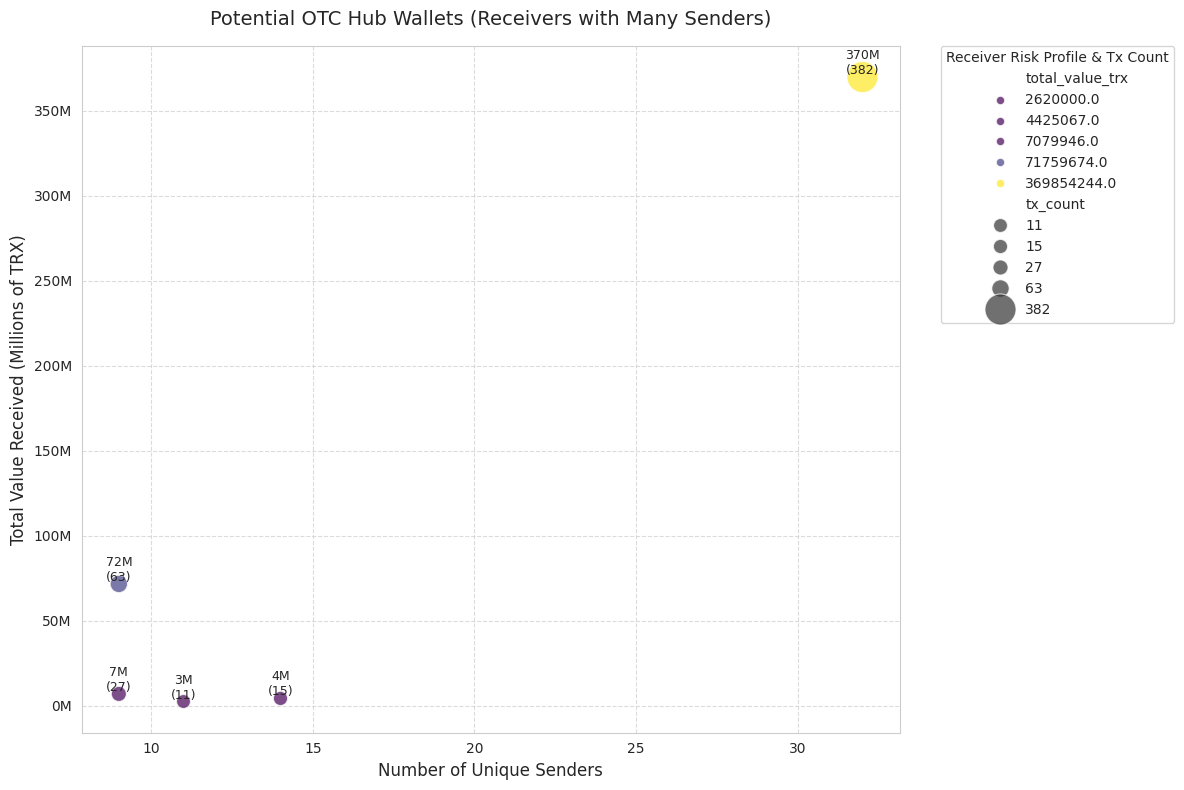

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Group by receiver to count unique senders and total value
receiver_activity = df.groupby('receiver_tron_address').agg({
    'sender_tron_address': 'nunique',
    'transaction_value_in_TRX': 'sum',
    'transaction_hash': 'count'
}).reset_index()

# Rename columns
receiver_activity.columns = ['receiver_tron_address', 'unique_senders', 'total_value_trx', 'tx_count']

# Filter potential hub wallets (e.g., >5 unique senders, total value >1M TRX)
hub_wallets = receiver_activity[(receiver_activity['unique_senders'] > 5) & (receiver_activity['total_value_trx'] > 1000000)]

# Merge with risk profile and receiver details
hub_wallets = hub_wallets.merge(df[['receiver_tron_address', 'receiver_risk_profile', 'receiver_tx_count', 'receiver_active_days']].drop_duplicates(), on='receiver_tron_address', how='left')

# Display results
print("Potential OTC Hub Wallets:")
print(hub_wallets.sort_values('total_value_trx', ascending=False))

# Plot hub wallets with enhanced visualization
plt.figure(figsize=(12, 8))  # Increased figure size

# Create scatter plot with color based on total_value_trx and size based on tx_count
scatter = sns.scatterplot(data=hub_wallets, 
                         x='unique_senders', 
                         y='total_value_trx', 
                         size='tx_count', 
                         hue='total_value_trx',  # Use color for total value
                         palette='viridis',      # Color gradient for better differentiation
                         sizes=(100, 500),       # Scale sizes from 100 to 500 based on tx_count
                         alpha=0.7)              # Slight transparency for overlap

# Add data labels for total_value_trx and tx_count
for i, row in hub_wallets.iterrows():
    plt.text(row['unique_senders'], row['total_value_trx'], 
             f'{row["total_value_trx"]/1e6:.0f}M\n({row["tx_count"]})', 
             ha='center', va='bottom', fontsize=9)

# Set title and labels with enhanced styling
plt.title('Potential OTC Hub Wallets (Receivers with Many Senders)', fontsize=14, pad=15)
plt.xlabel('Number of Unique Senders', fontsize=12)
plt.ylabel('Total Value Received (Millions of TRX)', fontsize=12)

# Format y-axis to show millions of TRX
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Add gridlines for better estimation
plt.grid(True, linestyle='--', alpha=0.7)

# Move legend outside the plot
plt.legend(title='Receiver Risk Profile & Tx Count', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0.)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

Number of round-number transactions: 129

Sample round-number transactions:
                   sender_tron_address               receiver_tron_address  \
8   TCghsCsZ8Qar5PUsGvqo23EUdWEWZNnzQ7  TDoXUNZ6PajKuiUkcYg3EDSV9bnqGqsbcf   
9   TCanb2dqnCV27juJzygNnrJX1uRC8CnDr9  TCghsCsZ8Qar5PUsGvqo23EUdWEWZNnzQ7   
51  TT2byZwhJ2UiF3HcfbjNKW49xvhP2rzTrE  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   
52  TT2byZwhJ2UiF3HcfbjNKW49xvhP2rzTrE  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   
53  TT2byZwhJ2UiF3HcfbjNKW49xvhP2rzTrE  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   

    transaction_value_in_TRX contract_name  
8                   100000.0           NaN  
9                   100000.0           NaN  
51                  500000.0          wbtc  
52                  500000.0          wbtc  
53                  500000.0       TrueUSD  


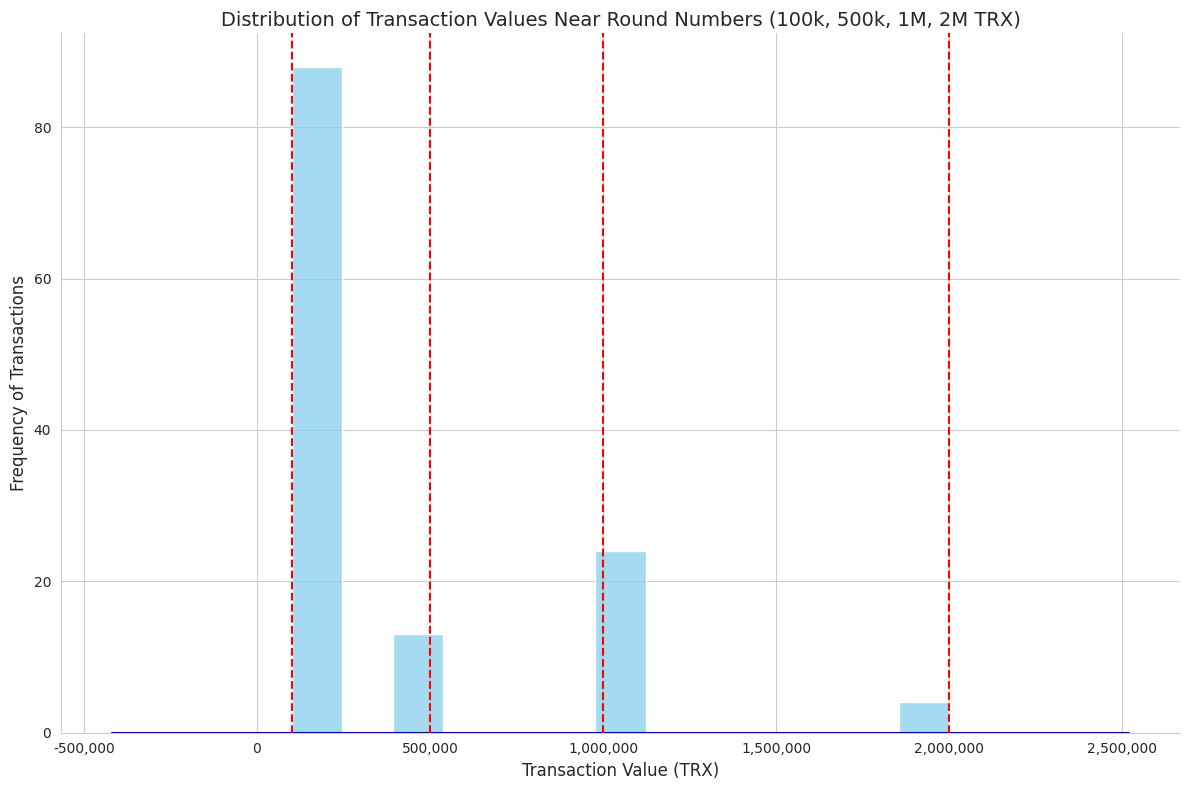

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

# Assuming df is already defined and has the necessary columns

# Define function to check if a value is close to a round number
def is_round_number(value, tolerance=100):
    round_values = [100000, 500000, 1000000, 2000000]
    return any(abs(value - rv) <= tolerance for rv in round_values)

# Apply to transaction_value_in_TRX using .loc
df.loc[:, 'is_round_number'] = df['transaction_value_in_TRX'].apply(is_round_number)

# Summarize
print("Number of round-number transactions:", df['is_round_number'].sum())
print("\nSample round-number transactions:")
print(df[df['is_round_number']][['sender_tron_address', 'receiver_tron_address', 'transaction_value_in_TRX', 'contract_name']].head())

# Set the style for a clean look with gridlines
sns.set_style("whitegrid")

# Create the figure with a larger size for better visibility
plt.figure(figsize=(12, 8))

# Plot the histogram without KDE
ax = sns.histplot(df[df['is_round_number']]['transaction_value_in_TRX'], bins='fd', color='skyblue', kde=False)

# Overlay the KDE plot with custom color
sns.kdeplot(df[df['is_round_number']]['transaction_value_in_TRX'], color='darkblue', ax=ax)

# Add vertical lines for round numbers to highlight key values
for rv in [100000, 500000, 1000000, 2000000]:
    plt.axvline(x=rv, color='red', linestyle='--')

# Set title and labels with improved clarity and font sizes
plt.title('Distribution of Transaction Values Near Round Numbers (100k, 500k, 1M, 2M TRX)', fontsize=14)
plt.xlabel('Transaction Value (TRX)', fontsize=12)
plt.ylabel('Frequency of Transactions', fontsize=12)

# Format x-axis with commas for readability
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Remove top and right spines for a cleaner appearance
sns.despine()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [100]:
# Group by transaction_hash to count unique contract_names
multi_token_tx = df.groupby('transaction_hash').agg({
    'contract_name': 'nunique',
    'transaction_value_in_TRX': 'first',
    'sender_tron_address': 'first',
    'receiver_tron_address': 'first'
}).reset_index()

# Filter transactions with multiple tokens
multi_token_tx = multi_token_tx[multi_token_tx['contract_name'] > 1]

# Display
print("Number of multi-token transactions:", len(multi_token_tx))
print("\nSample multi-token transactions:")
print(multi_token_tx[['transaction_hash', 'sender_tron_address', 'receiver_tron_address', 'transaction_value_in_TRX', 'contract_name']].head())

def create_simple_enhanced_plot(data, value_column='transaction_value_in_TRX'):
    """
    Simplified enhanced plot version
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    values = data[value_column].dropna()
    
    # Main histogram with better styling
    axes[0, 0].hist(values, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0, 0].axvline(values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {values.mean():,.0f}')
    axes[0, 0].axvline(values.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {values.median():,.0f}')
    axes[0, 0].set_xlabel('Transaction Value (TRX)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution with Statistics')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Log scale version
    axes[0, 1].hist(values, bins=30, alpha=0.7, color='coral', edgecolor='black')
    axes[0, 1].set_xlabel('Transaction Value (TRX)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Log Scale Distribution')
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Box plot
    axes[1, 0].boxplot(values, patch_artist=True)
    axes[1, 0].set_ylabel('Transaction Value (TRX)')
    axes[1, 0].set_title('Box Plot (Outlier Detection)')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Cumulative distribution
    sorted_values = np.sort(values)
    cumulative_pct = np.arange(1, len(sorted_values) + 1) / len(sorted_values) * 100
    axes[1, 1].plot(sorted_values, cumulative_pct, linewidth=2, color='green')
    axes[1, 1].set_xlabel('Transaction Value (TRX)')
    axes[1, 1].set_ylabel('Cumulative Percentage')
    axes[1, 1].set_title('Cumulative Distribution')
    axes[1, 1].set_xscale('log')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

Number of multi-token transactions: 81

Sample multi-token transactions:
                                     transaction_hash  \
2   0x020e0bc1f4d0eaade1b5e0339e7abc31408bd0be694f...   
3   0x023f6dfef83a75210d1d0c28469cb283b13c975078be...   
15  0x06fcb97a1d2af76a37f2f81d3864feccf9d70ddcb89d...   
31  0x0f5749e9162d9f911d452d046ed8aae129118047a92a...   
39  0x14fb4756d78bfd197ac6a8c561a1ded909bd95320584...   

                   sender_tron_address               receiver_tron_address  \
2   TAeYgpQPVNbaXZuPr9pnMr8KBJJR1GqvoC  TXF1xDbVGdxFGbovmmmXvBGu8ZiE3Lq4mR   
3   TP5pFBezqKerEYNJx9YyEyLbtgpJLxZZ8t  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   
15  TQXEmPhDqDQXHFPwTMcZeuUHSKiAavmYLk  TFVisXFaijZfeyeSjCEVkHfex7HGdTxzF9   
31  TBcRRYrjm5k9tJBREdaft2LgxRZtaaWjtV  TJ4NNy8xZEqsowCBhLvZ45LCqPdGjkET5j   
39  TLHv1y2oEXuKhdPFc6rEi8kTGSDJwCtxxT  TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj   

    transaction_value_in_TRX  contract_name  
2                  3419240.0              3  
3                  1796

TRANSACTION TIME GAP ANALYSIS
Total transactions: 990
Transactions with short time gaps (≤ 1 hour): 54
Percentage of short-gap transactions: 5.45%

Time Gap Statistics:
Mean: 0.156 hours
Median: 0.083 hours
Min: 0.017 hours
Max: 0.767 hours
Std Dev: 0.190 hours

Sample of short-gap transactions:
                                                             wallet_pair          block_time  time_diff_hours  transaction_value_in_TRX
(TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi, TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj) 2025-06-04 15:08:00         0.066667                 1776680.0
(TAhmPMYCDhnUztf1ZYYwNEmWYfqyW3uAvi, TCFNp179Lg46D16zKoumd4Poa2WFFdtqYj) 2025-06-04 15:09:00         0.016667                  187420.0
(TBcRRYrjm5k9tJBREdaft2LgxRZtaaWjtV, TJ4NNy8xZEqsowCBhLvZ45LCqPdGjkET5j) 2025-06-05 23:21:00         0.050000                  108000.0
(TBcRRYrjm5k9tJBREdaft2LgxRZtaaWjtV, TJ4NNy8xZEqsowCBhLvZ45LCqPdGjkET5j) 2025-06-05 23:22:00         0.016667                  133000.0
(TBei4L4q3xnKZAxverHh7r

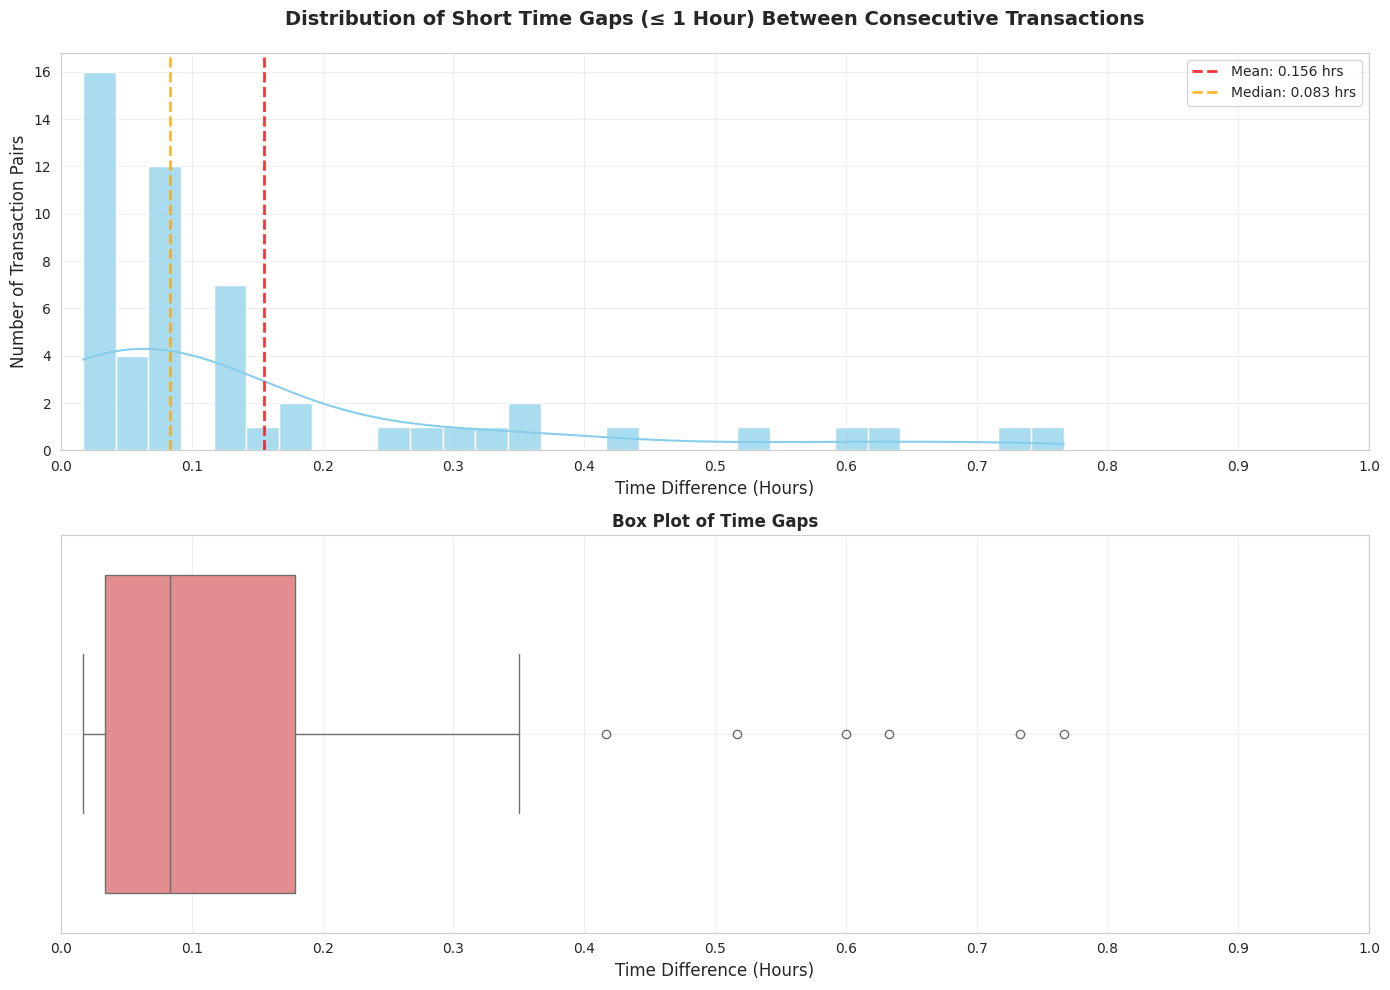


Most common time gap ranges:
  (0.0, 0.1]: 32 transactions
  (0.1, 0.2]: 10 transactions
  (0.2, 0.3]: 2 transactions
  (0.3, 0.4]: 4 transactions
  (0.4, 0.5]: 1 transactions


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Enhanced data preprocessing with error handling
def preprocess_data(df):
    """Preprocess the dataframe with robust error handling"""
    df_clean = df.copy()
    
    # Convert block_time to datetime with multiple format attempts
    if df_clean['block_time'].dtype == 'object':
        try:
            # Try multiple date formats
            df_clean['block_time'] = pd.to_datetime(df_clean['block_time'], format='%d/%m/%Y %H:%M')
        except ValueError:
            try:
                df_clean['block_time'] = pd.to_datetime(df_clean['block_time'], format='%Y-%m-%d %H:%M:%S')
            except ValueError:
                # Let pandas infer the format
                df_clean['block_time'] = pd.to_datetime(df_clean['block_time'], infer_datetime_format=True)
    
    # Sort by wallet_pair and block_time
    df_clean = df_clean.sort_values(['wallet_pair', 'block_time']).reset_index(drop=True)
    
    return df_clean

# Preprocess data
df_processed = preprocess_data(df)

# Calculate time differences between consecutive transactions for each wallet pair
df_processed['time_diff_hours'] = (
    df_processed.groupby('wallet_pair')['block_time']
    .diff()
    .dt.total_seconds() / 3600
)

# Filter for transactions with short time gaps (≤ 1 hour)
short_gap_df = df_processed[
    df_processed['time_diff_hours'].notna() & 
    (df_processed['time_diff_hours'] <= 1) &
    (df_processed['time_diff_hours'] > 0)  # Exclude negative or zero values
].copy()

# Enhanced summary statistics
print("=" * 60)
print("TRANSACTION TIME GAP ANALYSIS")
print("=" * 60)
print(f"Total transactions: {len(df_processed):,}")
print(f"Transactions with short time gaps (≤ 1 hour): {len(short_gap_df):,}")
print(f"Percentage of short-gap transactions: {len(short_gap_df)/len(df_processed)*100:.2f}%")

if len(short_gap_df) > 0:
    print(f"\nTime Gap Statistics:")
    print(f"Mean: {short_gap_df['time_diff_hours'].mean():.3f} hours")
    print(f"Median: {short_gap_df['time_diff_hours'].median():.3f} hours")
    print(f"Min: {short_gap_df['time_diff_hours'].min():.3f} hours")
    print(f"Max: {short_gap_df['time_diff_hours'].max():.3f} hours")
    print(f"Std Dev: {short_gap_df['time_diff_hours'].std():.3f} hours")
    
    print(f"\nSample of short-gap transactions:")
    display_cols = ['wallet_pair', 'block_time', 'time_diff_hours']
    if 'transaction_value_in_TRX' in short_gap_df.columns:
        display_cols.append('transaction_value_in_TRX')
    
    print(short_gap_df[display_cols].head(10).to_string(index=False))
    
    # Enhanced visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Main histogram with KDE
    sns.histplot(
        data=short_gap_df, 
        x='time_diff_hours', 
        bins=30, 
        kde=True,
        stat='count',
        alpha=0.7,
        color='skyblue',
        ax=ax1
    )
    
    # Add statistical lines
    mean_time = short_gap_df['time_diff_hours'].mean()
    median_time = short_gap_df['time_diff_hours'].median()
    
    ax1.axvline(mean_time, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_time:.3f} hrs', alpha=0.8)
    ax1.axvline(median_time, color='orange', linestyle='--', linewidth=2, 
                label=f'Median: {median_time:.3f} hrs', alpha=0.8)
    
    # Formatting for main plot
    ax1.set_title('Distribution of Short Time Gaps (≤ 1 Hour) Between Consecutive Transactions', 
                  fontsize=14, fontweight='bold', pad=20)
    ax1.set_xlabel('Time Difference (Hours)', fontsize=12)
    ax1.set_ylabel('Number of Transaction Pairs', fontsize=12)
    ax1.set_xlim(0, 1)
    ax1.set_xticks(np.arange(0, 1.1, 0.1))
    ax1.grid(True, alpha=0.3, linestyle='-')
    ax1.legend(fontsize=10)
    
    # Box plot for additional insights
    sns.boxplot(data=short_gap_df, x='time_diff_hours', ax=ax2, color='lightcoral')
    ax2.set_title('Box Plot of Time Gaps', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Time Difference (Hours)', fontsize=12)
    ax2.set_xlim(0, 1)
    ax2.set_xticks(np.arange(0, 1.1, 0.1))
    ax2.grid(True, alpha=0.3, linestyle='-')
    
    plt.tight_layout()
    plt.show()
    
    # Additional analysis: Most frequent time gaps
    print(f"\nMost common time gap ranges:")
    bins = np.arange(0, 1.1, 0.1)
    gap_counts = pd.cut(short_gap_df['time_diff_hours'], bins=bins).value_counts().sort_index()
    for interval, count in gap_counts.head().items():
        print(f"  {interval}: {count} transactions")
        
else:
    print("\nNo transactions found with time gaps ≤ 1 hour")
    print("Consider increasing the time threshold or checking your data")